# PyARPES の使い方（私家版）

## はじめに。

[pyarpes](https://arpes.readthedocs.io/)といpython ライブラリがある。
かなり不完全なところがあって、バギーな関数もある様だけど、一応なりとも使える（かな）。
もっともIgorで行う解析と何が違うのか？という疑問はあって、結局Igorでやることになるとは思うのだけど、大量データを扱うことを考えたときに便利かもしれない。
というか、便利なのが分かったらIgor procedureを書かないといけないので、そのプロトタイプと考えると良いのかもしれない。
基本的に xarray を拡張したファイルを取り扱う設計で、 xarray そのものは安定しているようなので、信頼性は比較的高い。


## autoreload 関係。
最終的にはここは無くてもいい。

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## import 

以下の様にしておこう。

* まあ numpy はいるだろし。
* matplotlib もあらわに出しておいた方が、チューニングしやすい。
* arpes.config は（おそらく）必須。
* pes.SPD_main import SPDEndstation は僕が書いた。（ので読むディレクトリが apres. 以下ではない）
* qt_tool は PyQtを利用した、データ表示。
* ktool は　...
* convert_to_kspace は　角度-> 運動量変換（ただ、どこまでデータの内容を考えて変換しようとしているのか、現在（2022/05/09）まだ未決。おそらくは、Binding energyとして処理をすすめることを前提しているようだ。
* hvplot.xarray は無くても良いかもしれない。Bokeh を使ってみたいときに。

PyQt5を要求している。

* (pip ではインストール失敗するので、Brew　でインストールする必要がある）。
* ```brew install pyqt5``` の後

```bash
ln -s /opt/homebrew/Cellar/pyqt@5/${pyqt_version}/lib/python${python_version}/site-packages/*  $(dirname $(which python))/../lib/python${python_version}/site-packages/
```
といった処理が必要かもしれない。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import arpes.config
from arpes.io  import load_data
from pes.SPD_main import  SPDEndstation
from arpes.plotting.qt_tool import qt_tool
from arpes.plotting.qt_ktool import ktool
from arpes.utilities.conversion import convert_to_kspace
# import hvplot.xarray

/Users/arafune/src/arpes/arpes/config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/unnamed_2023-05-22_20-52-39.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


## データのロード

自分で測定したデータを読み込むために、
* from arpes.io  import load_data 

が必須。

自分のデータの内容に不安を覚えたら、
* from arpes.io import example_data

を使い、

```python:
ex = example_data.cut
```

として、　ex の中身を見て比べてみると何かヒントがあるかもしれない。


In [3]:
from arpes.io import example_data

load_data は以上のような関数で、実際に使うだけなら、そんなにむずかしくない。単純に

In [5]:
f=load_data("/Users/arafune/src/analysis_tool/test/pes/PES_16 2022-02-28_13h02m29s_2_Spectrum_3.itx",location="SPD_phoibos")
f2 = load_data("/Users/arafune/src/analysis_tool/test/pes/GrIr_20211112-1.sp2", location="SPD_phoibos")

でよい。ただし、

* x, y, z 軸の値や 角度βを記録に含めたい。

など、itx ファイルや、 sp2ファイルに記載されない情報も 付加させたいときは。

```python
f=load_data("/Users/arafune/src/analysis_tool/test/pes/PES_16 2022-02-28_13h02m29s_2_Spectrum_3.itx",location="SPD_phoibos",
             x=1,
             sample_name="Cu(111)")
```

などと、することができる。

''x'' や ''sample_name''　などの変数名は予め定義されているのでそれを使うように推奨される。（そうでないと、ただのコメントにしかならない）
どのような変数名が公式なものかは、どこにもリストらしきものはないので、実際に読み込んだ後で、チェックする必要があるかもしれない。

* sample_name
* sample_workfunction 

がちょっと知らないと使えない変数名。 ("sample" ではないし、 "workfunction"ではない。（アナライザーの仕事関数として予約されている） )
このマニュアルでは（少なくともこのセクションでは）付加情報は加えていない。

``xarray_extensions.py`` を読むしかない。

In [5]:
f.attrs

{'Created Date (UTC)': '2022-Feb-28 05:03:33.001919',
 'Igor Text File Exporter Version': '0.3',
 'Created by': 'SpecsLab Prodigy, Version 4.86.2-r103043',
 'spectrum_type': 'cut',
 'Scan Mode': 'Fixed Analyzer Transmission',
 'User Comment': '',
 'Analysis Mode': 'UPS',
 'Lens Voltage': '40V',
 'Spectrum ID': 2,
 'Analyzer Slits': '1:0.5x20\\B:open',
 'Number of Scans': 30,
 'Number of Samples': 501,
 'Scan Step': 0.002,
 'DwellTime': 0.096,
 'Kinetic Energy': 9,
 'Binding Energy': -4.008,
 'Bias Voltage': -1.5,
 'angle_unit': 'rad (theta_y)',
 'energy_unit': 'eV (Kinetic Energy)',
 'count_unit': 'cps (Intensity)',
 'trace': Trace(silent=True, start_time=1652193674896514000),
 'hv': 4.992,
 'workfunction': 4.401,
 'lens_mode': 'WideAngleMode',
 'pass_energy': 5,
 'mcp_voltage': 1500,
 'x': nan,
 'y': nan,
 'z': nan,
 'theta': 0,
 'beta': 0,
 'chi': 0,
 'alpha': 1.5707963267948966,
 'analyzer': 'Specs PHOIBOS 100',
 'analyzer_name': 'Specs PHOIBOS 100',
 'parallel_deflectors': False,
 

## Plot

機能としてはシンプル。この辺は、 pyarpes の機能ではなく、 xarray の機能と考えるのが無難。
上述のごとくxarrayは比較的良く整備されているように見える。
ま、ただのデータ構造なので、メンテがそれほど難しくないのかもしれない。

### matplotlib base

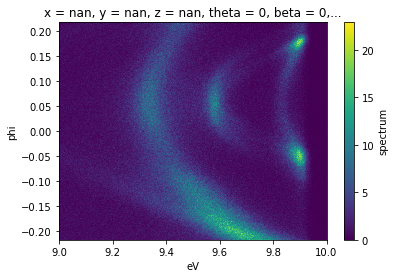

In [3]:
f.S.plot()

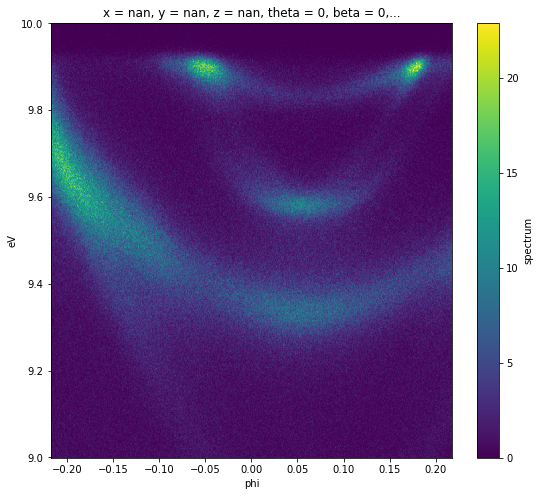

In [7]:
# このようにすると、matplotlib.pyplot の functionality（一部は） を活かすこともできる。
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
f.S.spectrum.T.plot(ax=ax)

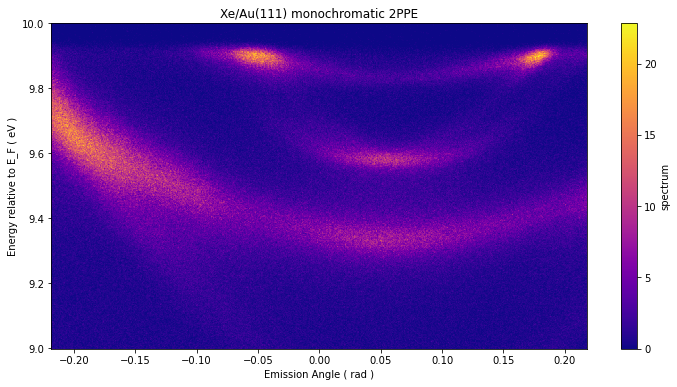

In [8]:
# ただサイズを変えたいだけなら、これで十分。カラーマップも変える事ができる。
f.S.spectrum.T.plot(aspect=2, size=6, cmap=plt.cm.plasma)
plt.ylabel("Energy relative to E_F ( eV )")
plt.xlabel("Emission Angle ( rad )")
plt.title("Xe/Au(111) monochromatic 2PPE")
plt.show()

### Bokeh base 

Bokeh を使って、インタラクティブな可視化をすることもできる。直接Bokeh を使っても良いはずだろうとは思うけど、ここではhvplot を使ってみる。
ただし、hvplot の出力はvscode で見ることができない様なので注意。

In [9]:
f.hvplot.image(colorbar=True)

:Image   [eV,phi]   (spectrum)

In [10]:
f.S.spectrum.T.hvplot(invert=True, frame_height=600, frame_width=800)

:Image   [eV,phi]   (spectrum)

## k-space 変換

In [11]:
from  arpes.utilities.conversion.bounds_calculations import calculate_kp_bounds

Text(0.5, 0, 'Emission Angle ( rad )')

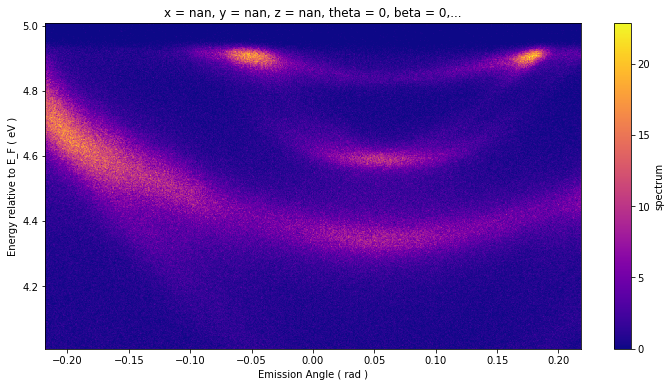

In [12]:
f=load_data("/Users/arafune/src/analysis_tool/test/pes/PES_16 2022-02-28_13h02m29s_2_Spectrum_3.itx",
location="SPD_phoibos", sample_workfunction=4.9)
# Binding energy としてデータを取り扱う必要があるので、以下の様にする。
f.coords["eV"] = f.coords["eV"] - f.attrs["hv"]
f.S.spectrum.T.plot(aspect=2, size=6, cmap=plt.cm.plasma)
plt.ylabel("Energy relative to E_F ( eV )")
plt.xlabel("Emission Angle ( rad )")

In [13]:
f.coords["eV"].min()

<xarray.DataArray 'eV' ()>
array(4.008)
Coordinates:
    x        float64 nan
    y        float64 nan
    z        float64 nan
    theta    int64 0
    beta     int64 0
    chi      int64 0
    hv       float64 4.992
    alpha    float64 1.571
    psi      int64 0